# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [2]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [64]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

def best_fit(x, y, m = 1):
    """
    Inputs: 
    x: feature variable vector
    y: response variable vector
    
    Outputs:
    beta: parameter ceofficents 
    """
    # create design matrix
    x1 = np.array(x)[np.newaxis]
    y1 = np.array(y)[np.newaxis]
    col1 = np.ones(len(x))[np.newaxis]
    design_matrix = np.concatenate((col1.transpose(), x1.transpose()), axis = 1)
    # fill the matrix for the specified m
    for i in range(1, m): 
        # skip index 0 because we arleady did it
        power_array = col1 + i
        temp = np.power(x1, power_array)
        design_matrix = np.concatenate((design_matrix, temp.transpose()), axis = 1)
    print("Design Matrix:")
    print(design_matrix)
        

    beta = inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ y1.transpose()
    return beta

pcoeff = best_fit(x, y , 2)
print("Parameter coefficents:")
print(pcoeff)

Design Matrix:
[[ 1.     -1.      1.    ]
 [ 1.     -0.7     0.49  ]
 [ 1.     -0.43    0.1849]
 [ 1.     -0.14    0.0196]
 [ 1.     -0.14    0.0196]
 [ 1.      0.43    0.1849]
 [ 1.      0.71    0.5041]
 [ 1.      1.      1.    ]
 [ 1.      1.29    1.6641]
 [ 1.      1.57    2.4649]
 [ 1.      1.86    3.4596]
 [ 1.      2.14    4.5796]
 [ 1.      2.43    5.9049]
 [ 1.      2.71    7.3441]
 [ 1.      3.      9.    ]]
Parameter coefficents:
[[-1.25772058]
 [-0.65313865]
 [ 1.0667959 ]]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [134]:
def best_fit1(x, y, m = 1):
    """
    This does the same thing as the other one but removes the print statements for brevity 
    
    Inputs: 
    x: feature variable vector
    y: response variable vector
    
    Outputs:
    beta: parameter ceofficents 
    """
    # create design matrix
    x1 = np.array(x)[np.newaxis]
    y1 = np.array(y)[np.newaxis]
    col1 = np.ones(len(x))[np.newaxis]
    design_matrix = np.concatenate((col1.transpose(), x1.transpose()), axis = 1)
    # fill the matrix for the specified m
    for i in range(1, m): 
        # skip index 0 because we arleady did it
        power_array = col1 + i
        temp = np.power(x1, power_array)
        design_matrix = np.concatenate((design_matrix, temp.transpose()), axis = 1)
    #print("Design Matrix:")
    #print(design_matrix)
        

    beta = inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ y1.transpose()
    return beta

def compute_poly(pm, x, m):
    xval = 0
    for i in range(m):
        if i == 0:
            xval += pm[i]
        if i == 1:
            xval += pm[i] * x
        xval += pm[i] * x**(i)
    return xval

def optimal_m(x, y, mval):
    for m in range(mval):
        print("m equals:")
        print(m)
        pm = best_fit1(x, y, m)
        if (len(x) - m) == 0:
            pass
        else:
            lead_coeff = 1/(len(x) - m)
            temp = 0
            for i in range(len(x)):
                pmx = compute_poly(pm, x[i], m)
                temp += (pmx - y[i])**2
            mval = temp * lead_coeff
            print("Output: ")
            print(mval)
            
optimal_m(x, y, 4)
# optimal value of m is approximately 4

m equals:
0
Output: 
8.120533333333334
m equals:
1
Output: 
[12.6958371]
m equals:
2
Output: 
[42.8878154]
m equals:
3
Output: 
[131.05275611]


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

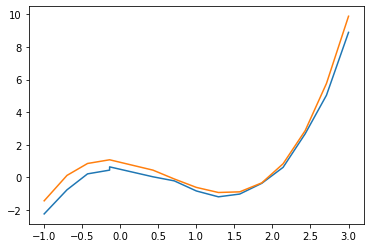

In [139]:
import matplotlib.pyplot as plt

plt.plot(x,y)

def best_fit2(x, y, m = 1):
    """
    This does the same thing as the other one but removes the print statements for brevity 
    
    Inputs: 
    x: feature variable vector
    y: response variable vector
    
    Outputs:
    beta: parameter ceofficents 
    """
    # create design matrix
    x1 = np.array(x)[np.newaxis]
    y1 = np.array(y)[np.newaxis]
    col1 = np.ones(len(x))[np.newaxis]
    design_matrix = np.concatenate((col1.transpose(), x1.transpose()), axis = 1)
    # fill the matrix for the specified m
    for i in range(1, m): 
        # skip index 0 because we arleady did it
        power_array = col1 + i
        temp = np.power(x1, power_array)
        design_matrix = np.concatenate((design_matrix, temp.transpose()), axis = 1)
    #print("Design Matrix:")
    #print(design_matrix)
        

    beta = inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ y1.transpose()
    return beta

def compute_poly(pm, x, m):
    xval = 0
    for i in range(m):
        if i == 0:
            xval += pm[i]
        if i == 1:
            xval += pm[i] * x
        xval += pm[i] * x**(i)
    return xval

def create_y(x, y, mval):
    yval = []
    pm = best_fit2(x, y, mval)
    for i in range(len(x)):
        pmx = compute_poly(pm, x[i], mval)
        yval.append(pmx[0])
    return yval
    
y1 = create_y(x, y, 4)
plt.plot(x, y1)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, without ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [156]:
from scipy.linalg import qr

def qr_lls(x, y, m = 1):
    """
    This does the same thing as the other one but removes the print statements for brevity 
    
    Inputs: 
    x: feature variable vector
    y: response variable vector
    
    Outputs:
    beta: parameter ceofficents 
    """
    # create design matrix
    x1 = np.array(x)[np.newaxis]
    y1 = np.array(y)[np.newaxis]
    col1 = np.ones(len(x))[np.newaxis]
    design_matrix = np.concatenate((col1.transpose(), x1.transpose()), axis = 1)
    # fill the matrix for the specified m
    for i in range(1, m): 
        # skip index 0 because we arleady did it
        power_array = col1 + i
        temp = np.power(x1, power_array)
        design_matrix = np.concatenate((design_matrix, temp.transpose()), axis = 1)
    q, r = qr(design_matrix)
    y_f = q.transpose() 
    f = y_f[:5] @ y     
    beta = np.linalg.solve(r[:5], f)
    #beta = inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ y1.transpose()
    return beta

solution = qr_lls(x, y, 4)
print(solution)

[ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

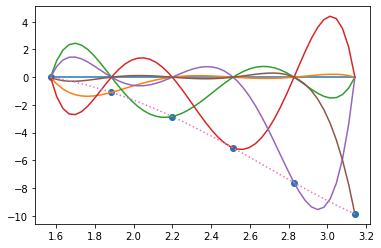

In [186]:
import math

def f(x):
    return (x**2) * math.cos(x)

class LagrangePoly():
    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def basis(self, x, j):
        b = [(x - self.X[m]) / (self.X[j] - self.X[m])
             for m in range(self.n) if m != j]
        return np.prod(b, axis=0) * self.Y[j]

    def interpolate(self, x):
        b = [self.basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)


X  = np.linspace(math.pi/2, math.pi, 6) 
Y = []
for i in range(len(X)):
    temp = f(X[i])
    Y.append(temp)

plt.scatter(X, Y)

lp = LagrangePoly(X, Y)

xx = np.linspace(math.pi/2, math.pi) 

plt.plot(xx, lp.basis(xx, 0))
plt.plot(xx, lp.basis(xx, 1))
plt.plot(xx, lp.basis(xx, 2))
plt.plot(xx, lp.basis(xx, 3))
plt.plot(xx, lp.basis(xx, 4))
plt.plot(xx, lp.basis(xx, 5))
plt.plot(xx, lp.interpolate(xx), linestyle=':')
plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [189]:
np.polynomial.Chebyshev.interpolate(f(X), 3)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'